In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sbs
import nltk

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reaksa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/reaksa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/reaksa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/uci_news_aggregator.csv')

In [5]:
dataset = df[['TITLE','CATEGORY']]
dataset.head(2)

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b


In [6]:
if(any(dataset.isnull().any())):
    print("Data Missiong need clean!")
    print(dataset.isnull().sum())
else:
    print("Very Good Data")

Very Good Data


In [7]:
if(any(dataset['TITLE'].duplicated() == True)):
    dataset['TITLE'].drop_duplicates(inplace=True)
    dataset['TITLE'].reset_index(inplace=True,drop=True)
    print(dataset['TITLE'].duplicated().sum())
else:
    print("No duplicate")

15964


/var/folders/vx/sf0f544n0hv662y7zddfc0_c0000gn/T/ipykernel_9812/451980953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TITLE'].drop_duplicates(inplace=True)


<Axes: xlabel='CATEGORY', ylabel='count'>

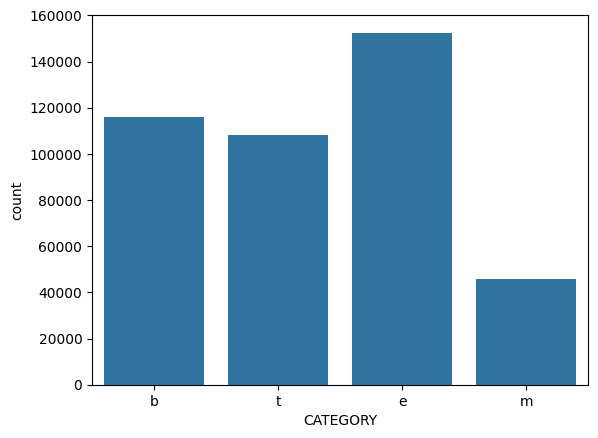

In [9]:
sbs.countplot(x='CATEGORY', data=dataset)

In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

In [15]:
cleaned = []
for i in range(0,len(dataset)):
    
    # removing any other words than (a-z) and (A-Z)-> {};():,."/<>-
    msg = re.sub('[^a-zA-Z{};():,."/<>-]',' ',  dataset['TITLE'][i])
    
    #converting all texts to lower case
    msg = msg.lower()
    
    # #tokenizing
    msg = msg.split(' ')
    
    # #stemming and removing stopwords
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

In [16]:
x = np.array(cleaned)

In [17]:
y = np.array(df['CATEGORY'])


In [18]:
lb = LabelEncoder()
leble = lb.fit_transform(y)

In [19]:
leble

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
X_train, X_test , y_train, y_test = train_test_split(x , leble, test_size=0.25, random_state=42)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [24]:
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 4), random_state=1)

In [25]:
model.fit(tfidf_train_vectors, y_train)

/Users/reaksa/Desktop/text-classification/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 4), random_state=1)

In [26]:
model.score(tfidf_train_vectors, y_train)

0.986657786587714

In [27]:
pre =  model.predict(tfidf_test_vectors)
pre[1]

2

In [28]:
from sklearn.metrics import classification_report

In [29]:
target = ['Business','Science','Entertainment','Health']
report = classification_report(pre, y_test, target_names=target)
print(report)

               precision    recall  f1-score   support

     Business       0.90      0.91      0.90     29002
      Science       0.96      0.96      0.96     37938
Entertainment       0.91      0.90      0.91     11392
       Health       0.91      0.91      0.91     27273

     accuracy                           0.93    105605
    macro avg       0.92      0.92      0.92    105605
 weighted avg       0.93      0.93      0.93    105605



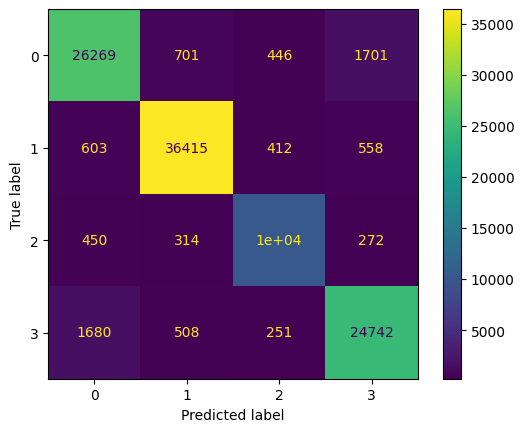

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
rm = confusion_matrix(y_test, pre, labels=model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=rm, display_labels=model.classes_)
dis.plot()